<a href="https://colab.research.google.com/github/amohd63/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp5_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.3 Procedures**

## **1.3.1 Data Generation**

We use make blobs to create 3 synthetic clusters in 2D.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

We can visualize the resulting data:

Text(0.5, 1.0, 'Blobs with lables')

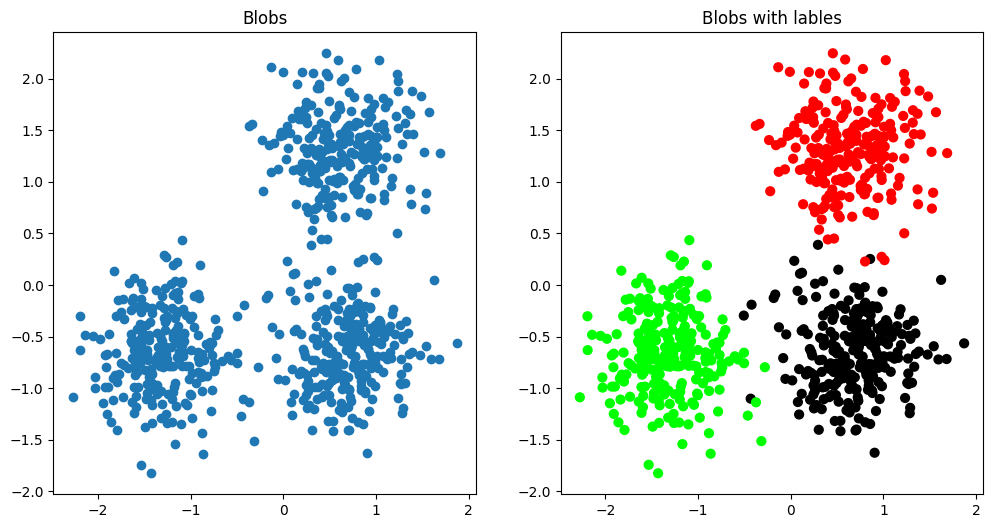

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()

# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

## **1.3.2 Compute KMeans**

The first algorithm to be leveraged on the generated data (i.e., blobs) is KMeans.

Try different values of K

In [4]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualize the point membership after KMeans clustering algorithm. Compare the results with ground truth (GT) point memberships.

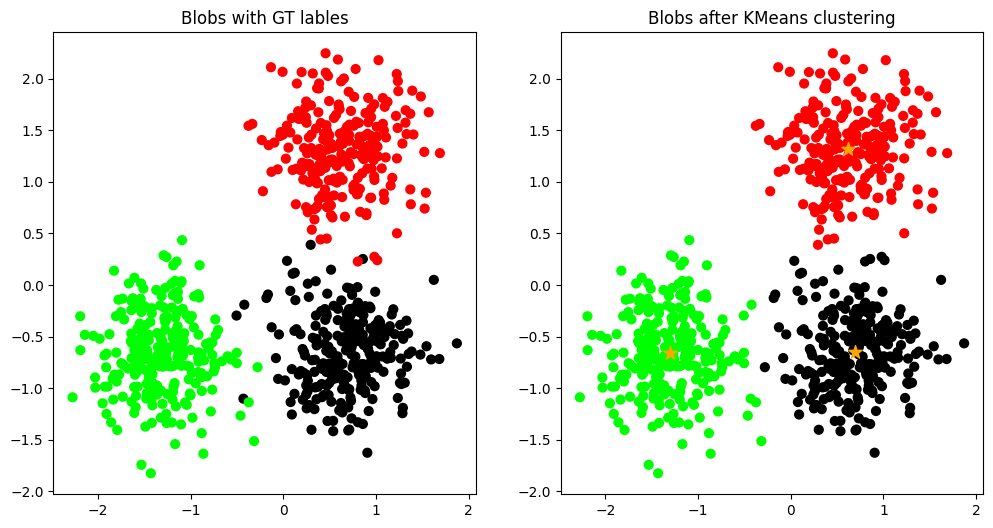

In [5]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')

# We will also get the coordinates of the cluster centers using KMeans
# .cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_

# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', c='orange',s=100)

## **1.3.3 Compute DBSCAN**

The second algorithm to be leveraged on the generated data (i.e., blobs) is DBSCAN.

Try different values of ϵ and MinPts (min samples)

One can access the labels assigned by DBSCAN using the labels attribute. Noisy samples are given the label math:−1.

In [6]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Visualize the point membership after DBSCAN clustering algorithm. Compare the results with GT point memberships.

Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 3')

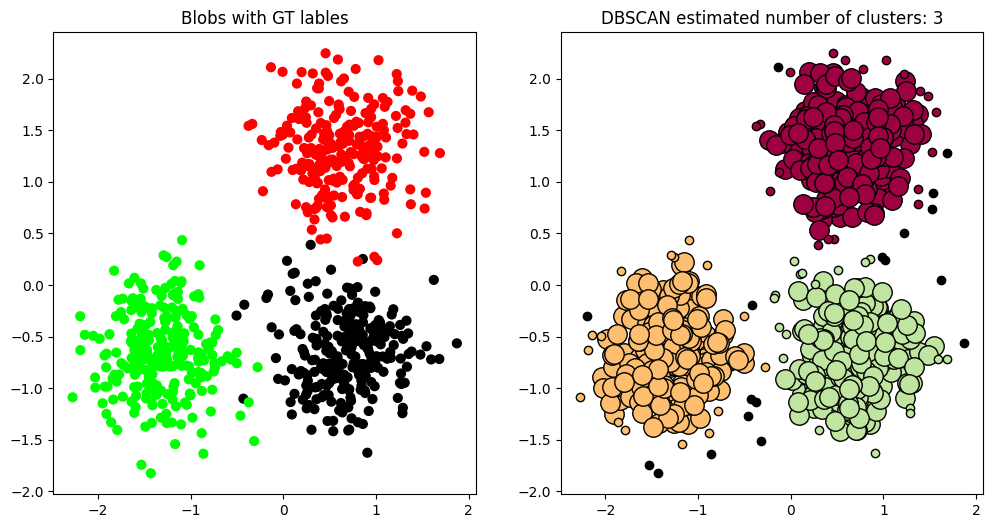

In [7]:
plt.figure(figsize=(12,6))
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after DBSCAN clustering. I used a different
# visualization/plot to show the core points and the noisy points in
# different color and size
plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = labels == k

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(
      xy[:, 0],
      xy[:, 1],
      "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=14,
  )

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
      xy[:, 0],
      xy[:, 1],
      "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=6,
  )

plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

## **1.3.4 Compute Gaussian Mixture Model (GMM)**

The third algorithm to be leveraged on the generated data (i.e., blobs) is Gaussian mixture models (GMMs). Try different values of n components.

In [8]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Visualize the point membership after GMM clustering algorithm. Compare the results with GT point memberships

Text(0.5, 1.0, 'Blobs after GMMs clustering')

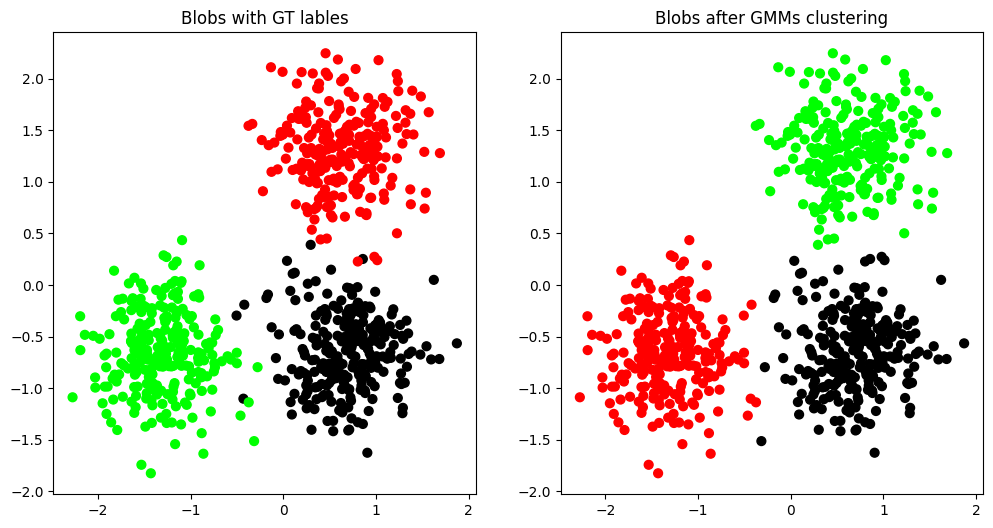

In [9]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

# **1.4 Quantitative results comparison of the clustering methods using evaluation measures**

In the previous sections, we qualitatively assessed the performance of the clustering methods by visually comparing their results with GT data. However, we need quantification to determine the performance of the various clustering algorithms. The quantitative analysis requires GT labels. The below code shows the performance comparison of the three clustering methods adopted in this experiment. We selected the well-known evaluation measures. You can try the other evaluation criteria by yourself.

In [10]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, predY):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")

print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, y_cluster_gmm):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.938
Silhouette Coefficient: 0.650


# **1.5 To DO**

1. Repeat the above procedure by generating two moons of data. Compare the performance of the clustering algorithms, qualitatively and quantitatively, when applied to the blobs dataset and two moons datasets. Use the below code to generate the two moons dataset.

---

In [ ]:
# Generate a non Gaussian 2D dataset (two moons)
from sklearn.datasets import make_moons
X, labels_true = make_moons(n_samples=500, noise=0.1)

---
You need to set K = 2 for KMeans and ϵ = 0.15, min samples = 5 for the DBSCAN algorithm.

2. K-means attempts to minimize the total squared error, while k-medoids minimize the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k -means algorithm, k -medoids choose data points as centers (medoids or exemplars). Compare, qualitatively and quantitatively, the results of k-means and k-medoid when applied to the blobs dataset.

3. Write a Python program that takes your own color image as input and segments the image into a) K = 2, b) K = 5 and c) K = 10 clusters using K-mean clustering. Display the resulting images. Discuss your observation about both images. You might need to hand this ToDo in the next lab.